# Face Mask Detection System

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import cv2
import gc
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping

## Load Preprocessed Data

In [2]:
data = np.load('D:/tuansihan/06 Projects/08 Face Mask Detection System/data/preprocessed_data.npz')

In [3]:
X = data['arr_0']
y = data['arr_1']

In [4]:
X.shape, y.shape

((11940, 100, 100, 3), (11940,))

In [5]:
np.unique(y)

array(['Chin Uncovered', 'Covered', 'Nose & Mouth Uncovered',
       'Nose Uncovered'], dtype='<U22')

## Preprocessing y

In [6]:
oh = OneHotEncoder()

# Reshape y to 2D
# y.reshape(-1,1)
y_oneHot = oh.fit_transform(y.reshape(-1,1))

In [7]:
y_array = y_oneHot.toarray()

In [8]:
y_array

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [9]:
y_array.shape

(11940, 4)

## Split Data into Train and Test

In [10]:
# Splitting data into 80% Train & 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y_array, test_size = 0.2, random_state = 42)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9552, 100, 100, 3), (2388, 100, 100, 3), (9552, 4), (2388, 4))

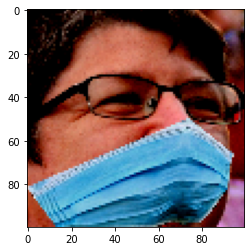

1


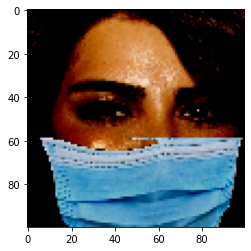

2


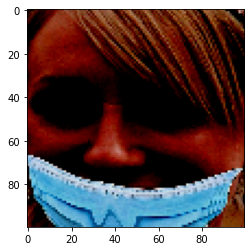

3


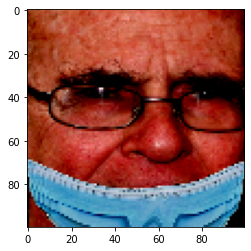

4


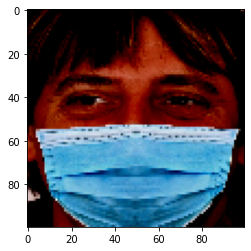

5


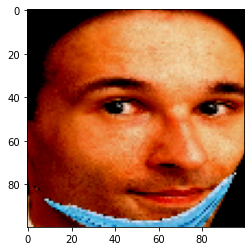

6


In [31]:
x = 0
for i in X_train:
    plt.imshow(i)
    plt.show()

    x+=1
    #print (x)
    if x>5:
        break

In [32]:
# x = 0
# # for i in X_train:
# #     plt.imshow(i)
# #     plt.show()
# for i in y_train:
#     print(i)
    
        
#     x+=1
#     print (x)
#     if x>5:
#         break

## Develop Convolutional Neural Network

In [33]:
# TensorBoard
NAME = 'secondModel-256-{}'.format(int(time.time()))
tb = TensorBoard(log_dir='D:/tuansihan/06 Projects/08 Face Mask Detection System/models/{}'.format(NAME))
callbacks = [tb,]

In [34]:
model = Sequential([
    layers.Conv2D(64,3,padding='same',input_shape=(100,100,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    #layers.Dense(192,activation='relu'),
    #layers.Dense(28,activation='relu'),
    layers.Dense(4,activation='softmax')
])

In [35]:
# Compiling CNN (Adam Optimizer)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 16)       0

## Model Training

In [37]:
history = model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=30,epochs=10,callbacks=[callbacks])

Epoch 1/10
319/319 [==============================] - 102s 308ms/step - loss: 0.2525 - accuracy: 0.9135 - val_loss: 0.1194 - val_accuracy: 0.9648
Epoch 2/10
319/319 [==============================] - 100s 314ms/step - loss: 0.0870 - accuracy: 0.9728 - val_loss: 0.0961 - val_accuracy: 0.9736
Epoch 3/10
319/319 [==============================] - 100s 315ms/step - loss: 0.0639 - accuracy: 0.9816 - val_loss: 0.0824 - val_accuracy: 0.9736
Epoch 4/10
319/319 [==============================] - 100s 315ms/step - loss: 0.0483 - accuracy: 0.9850 - val_loss: 0.0719 - val_accuracy: 0.9799
Epoch 5/10
319/319 [==============================] - 102s 320ms/step - loss: 0.0400 - accuracy: 0.9883 - val_loss: 0.0850 - val_accuracy: 0.9803
Epoch 6/10
319/319 [==============================] - 101s 316ms/step - loss: 0.0353 - accuracy: 0.9879 - val_loss: 0.0799 - val_accuracy: 0.9832
Epoch 7/10
319/319 [==============================] - 99s 309ms/step - loss: 0.0290 - accuracy: 0.9902 - val_loss: 0.0915 - 

In [38]:
# IF Error
# tf.config.run_functions_eagerly(True)

In [11]:
model = tf.keras.models.load_model('face_mask_model/')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 16)       0

In [15]:
# predictions = model.predict(x=X_train, y=y_train,verbose=0)

TypeError: predict() got an unexpected keyword argument 'y'

In [ ]:
# cm=confusion_matrix(y_true=test_generator.classes, y_pred=np.argmax(predictions, axis=-1))

In [ ]:
# def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
# 	plt.imshow(cm, interpolation='nearest', cmap=cmap)
# 	plt.title(title)
# 	plt.colorbar()
# 	tick_marks = np.arange(len(classes))
# 	plt.xticks(tick_marks,classes, rotation=45)
# 	plt.yticks(tick_marks,classes)

# 	if normalize:
# 		cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
# 		print("Normalized Confusion matrix")
# 	else:
# 		print("Confusion matrix, without normalization")

# 	print(cm)

# 	thresh = cm.max()/2
#     for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
# 		plt.text(j,i,cm[i,j],
# 				 horizontalalignment="center",
# 				 color="white" if cm[i,j] > thresh else "black")

# 	plt.tight_layout()
# 	plt.ylabel('true label')
# 	plt.xlabel('predicted label')

In [ ]:
# CAT=[['Chin Uncovered', 'Covered', 'Nose & Mouth Uncovered', 'Nose Uncovered']
# cm_plot_labels = CAT
# plot_confusion_matrix(cm=cm,classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
# ######### Conf Matrix 

# def plotImages(images_arr):
#     fig, axes = plt.subplots(1,10,figsize=(50,50))
#     axes = axes.flatten()
#     for img, ax in zip(images_arr, axes):
#         ax.imshow(img)
#         ax.axis('on')
#     plt.tight_layout
#     plt.show()

# #%%

# plotImages(imgs)
# print(labels)

## Visualize Model Performance

In [41]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.252480,0.913526,0.119420,0.964824
1,0.087014,0.972781,0.096139,0.973618
2,0.063854,0.981575,0.082364,0.973618
3,0.048281,0.985029,0.071926,0.979900
4,0.040047,0.988275,0.084978,0.980318
5,0.035347,0.987856,0.079917,0.983250
6,0.029007,0.990159,0.091496,0.975712
7,0.026091,0.991311,0.070169,0.984506
8,0.018561,0.994033,0.073965,0.982831
9,0.015958,0.995080,0.087229,0.982831


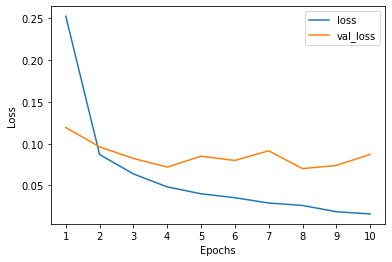

In [42]:
# Plot Loss
history_df[['loss', 'val_loss']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(list(range(10)), list(range(1,11)))
plt.show()

We can conclude that overfitting does not take place as the validation loss and train loss follow the same trend.

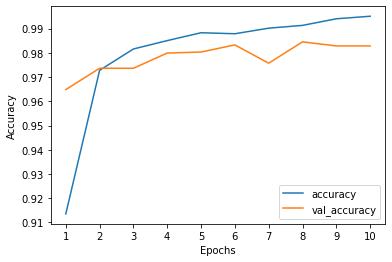

In [43]:
# Plot Accuracy
history_df[['accuracy', 'val_accuracy']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(list(range(10)), list(range(1,11)))
plt.show()

With an accuracy of 98% the model deems to perform well with high accuracy.

## Save CNN Model

In [47]:
oh.categories_

[array(['Chin Uncovered', 'Covered', 'Nose & Mouth Uncovered',
        'Nose Uncovered'], dtype='<U22')]

In [44]:
model.save('face_mask_model')

INFO:tensorflow:Assets written to: face_mask_model\assets
